# KNN no `chb05_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb05_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.945455,0.927273,0.909091,0.915152,0.890909,0.903030,0.915152,0.921212,0.878788,0.854545,0.951515,0.963636,0.878788,0.951515,0.951515,0.963636,0.915152,0.909091
1,0.890909,0.939394,0.921212,0.890909,0.909091,0.890909,0.909091,0.915152,0.884848,0.896970,0.945455,0.963636,0.872727,0.903030,0.963636,0.969697,0.909091,0.921212
2,0.903030,0.909091,0.884848,0.896970,0.860606,0.866667,0.872727,0.903030,0.854545,0.854545,0.933333,0.933333,0.836364,0.915152,0.951515,0.969697,0.830303,0.854545
3,0.866667,0.915152,0.921212,0.909091,0.854545,0.890909,0.927273,0.903030,0.842424,0.836364,0.945455,0.951515,0.812121,0.915152,0.969697,0.957576,0.836364,0.884848
4,0.890909,0.903030,0.921212,0.903030,0.884848,0.878788,0.903030,0.896970,0.872727,0.860606,0.933333,0.945455,0.824242,0.951515,0.957576,0.963636,0.854545,0.903030
5,0.854545,0.890909,0.866667,0.884848,0.812121,0.830303,0.872727,0.860606,0.836364,0.836364,0.909091,0.933333,0.824242,0.915152,0.957576,0.951515,0.848485,0.860606
6,0.933333,0.945455,0.927273,0.951515,0.878788,0.927273,0.945455,0.927273,0.896970,0.866667,0.945455,0.957576,0.866667,0.896970,0.963636,0.969697,0.872727,0.915152
7,0.921212,0.903030,0.903030,0.890909,0.866667,0.872727,0.915152,0.884848,0.884848,0.860606,0.933333,0.957576,0.866667,0.915152,0.957576,0.945455,0.866667,0.909091
8,0.921212,0.933333,0.921212,0.872727,0.903030,0.903030,0.890909,0.939394,0.896970,0.848485,0.927273,0.975758,0.903030,0.915152,0.945455,0.951515,0.872727,0.909091
9,0.884848,0.933333,0.878788,0.909091,0.884848,0.890909,0.921212,0.933333,0.884848,0.866667,0.945455,0.963636,0.854545,0.915152,0.945455,0.957576,0.860606,0.903030


,count,mean,std,min,25%,50%,75%,max
15,20.0,0.959394,0.009032,0.933333,0.957576,0.960606,0.963636,0.969697
14,20.0,0.956970,0.014962,0.927273,0.950000,0.957576,0.965152,0.981818
11,20.0,0.951515,0.019064,0.903030,0.945455,0.954545,0.963636,0.975758
10,20.0,0.934242,0.013231,0.909091,0.927273,0.933333,0.945455,0.951515
13,20.0,0.922727,0.017015,0.896970,0.915152,0.915152,0.934848,0.951515
1,20.0,0.919697,0.016901,0.890909,0.907576,0.918182,0.934848,0.945455
7,20.0,0.912727,0.021396,0.860606,0.901515,0.915152,0.928788,0.945455
2,20.0,0.906061,0.017532,0.866667,0.893939,0.909091,0.921212,0.927273
6,20.0,0.904242,0.024763,0.866667,0.889394,0.900000,0.916667,0.957576
3,20.0,0.898788,0.019074,0.872727,0.884848,0.893939,0.909091,0.951515


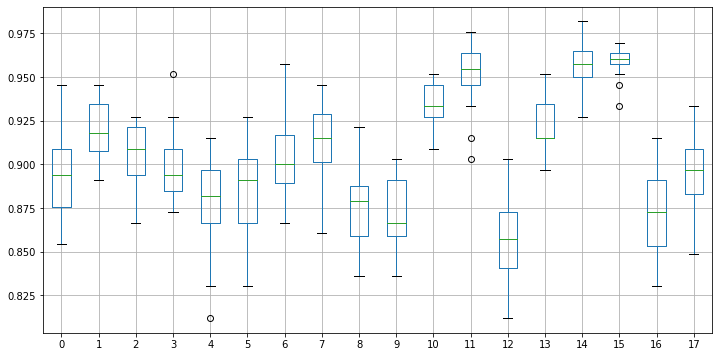

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '05'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.893939,0.025751,0.893939,05,0
1,0.919697,0.016901,0.918182,05,1
2,0.906061,0.017532,0.909091,05,2
3,0.898788,0.019074,0.893939,05,3
4,0.877576,0.025683,0.881818,05,4
5,0.882121,0.025898,0.890909,05,5
6,0.904242,0.024763,0.900000,05,6
7,0.912727,0.021396,0.915152,05,7
8,0.874848,0.023122,0.878788,05,8
9,0.871515,0.020302,0.866667,05,9
